In [22]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
#loading the dataset
df=pd.read_csv('../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
#showing the data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [47]:
#Onehot Encode
def onehot_encode(df,column_dict):
    #Copying the dataset
    df=df.copy()
    #creating the for loop through column and prefix
    for column, prefix in column_dict.items():
        #creating dummies function for each column
        dummies=pd.get_dummies(df[column],prefix=prefix)
        #concating the dummies column into dataframe
        df=pd.concat([df,dummies],axis=1)
        #dropping the original column
        df=df.drop(column,axis=1)
    #returning the dataframe
    return df

# Preprocessing Inputs

In [48]:
#nominal features
nominal_features=['cp','slope','thal']
dict(zip(nominal_features,['CP','SL','TH']))

{'cp': 'CP', 'slope': 'SL', 'thal': 'TH'}

In [49]:
def preprocess_inputs(df,scaler):
    #copying the dataset into a new variable
    df=df.copy()
    #One-hot encode the nominal features
    nominal_features=['cp','slope','thal']
    #applying onehot_encode to a nominal columns
    df=onehot_encode(df,dict(zip(nominal_features,['CP','SL','TH'])))
    
    #Split df into x and y
    y=df['condition'].copy()
    x=df.drop('condition',axis=1).copy()
    #Scaling the dataset
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)
    #returning the feature and target columns
    return x,y
    

# EDA
Let's get some boxplot for each numeric variable and a correlation heatmap in the dataset

In [13]:
#columns with numerical features
numeric_features=['age','sex','trestbps','chol','thalach','oldpeak','slope','ca']
#filtering the numerical column from dataframe
eda_df=df.loc[:,numeric_features].copy()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

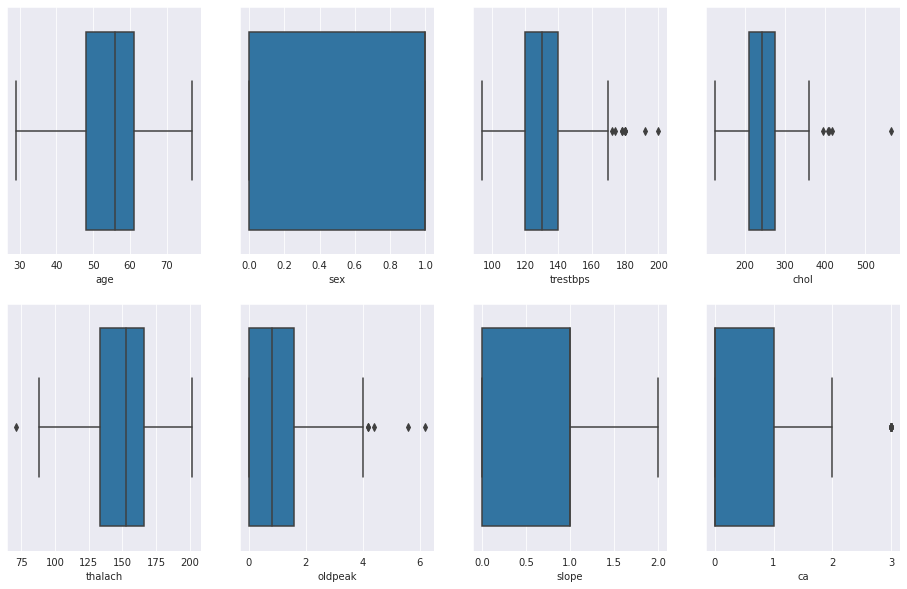

In [50]:
#setting up the figure size
plt.figure(figsize=(16,10))
#creating the loop and drawing boxplot
for i in range(len(eda_df.columns)):
    
    plt.subplot(2,4,i+1)
    #creating box plot
    sns.boxplot(eda_df[eda_df.columns[i]])
#showing the data
plt.show()

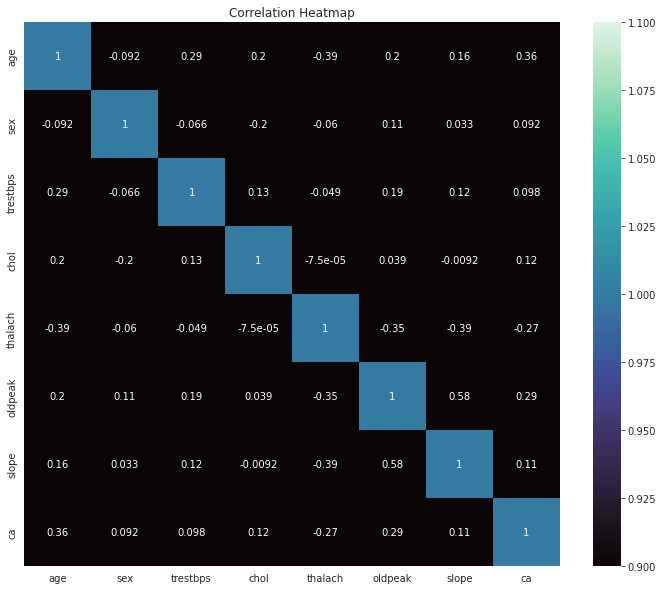

In [24]:
corr=eda_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

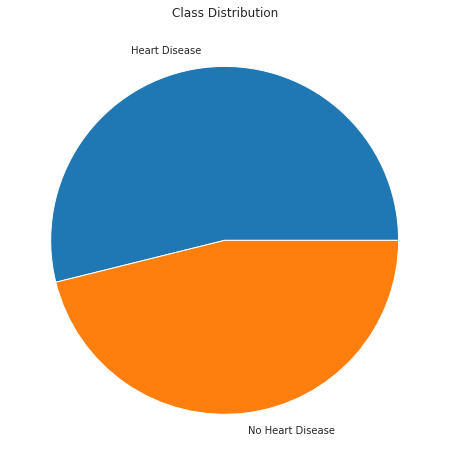

In [26]:
plt.figure(figsize=(8,8))
plt.pie(df['condition'].value_counts(),labels=['Heart Disease','No Heart Disease'])
plt.title('Class Distribution')
plt.show()

In [51]:
#creating unique value in each column
{column:len(x[column].unique()) for column in x.columns}

{'age': 41,
 'sex': 2,
 'trestbps': 50,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'ca': 4,
 'CP_0': 2,
 'CP_1': 2,
 'CP_2': 2,
 'CP_3': 2,
 'SL_0': 2,
 'SL_1': 2,
 'SL_2': 2,
 'TH_0': 2,
 'TH_1': 2,
 'TH_2': 2}

In [52]:
#applying the preprocess_inputs function
x,y=preprocess_inputs(df,StandardScaler())


In [53]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,CP_0,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2
0,1.600302,0.691095,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.344824,3.451528,-0.4445,-0.622776,-0.957146,-0.937948,1.080686,-0.275839,0.900542,-0.254,-0.794901
1,1.600302,-1.446980,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,1.411625,3.451528,-0.4445,-0.622776,-0.957146,1.066157,-0.925338,-0.275839,0.900542,-0.254,-0.794901
2,1.268242,-1.446980,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,-0.721976,3.451528,-0.4445,-0.622776,-0.957146,-0.937948,-0.925338,3.625308,0.900542,-0.254,-0.794901
3,1.157555,0.691095,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.344824,3.451528,-0.4445,-0.622776,-0.957146,-0.937948,1.080686,-0.275839,0.900542,-0.254,-0.794901
4,1.046868,0.691095,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,-0.721976,3.451528,-0.4445,-0.622776,-0.957146,-0.937948,1.080686,-0.275839,0.900542,-0.254,-0.794901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,0.691095,1.145127,-0.469085,-0.411450,-1.003419,1.371034,-0.696419,-0.906712,-0.721976,-0.289727,-0.4445,-0.622776,1.044772,1.066157,-0.925338,-0.275839,-1.110443,-0.254,1.258018
293,-1.720306,0.691095,-0.772215,-0.546141,-0.411450,-1.003419,-0.419131,-0.696419,0.124076,-0.721976,-0.289727,-0.4445,-0.622776,1.044772,-0.937948,1.080686,-0.275839,-1.110443,-0.254,1.258018
294,-2.163054,0.691095,-0.659431,-0.950688,-0.411450,-1.003419,-0.855757,1.435916,0.467672,-0.721976,-0.289727,-0.4445,-0.622776,1.044772,-0.937948,1.080686,-0.275839,-1.110443,-0.254,1.258018
295,-2.163054,-1.446980,0.355633,-1.239649,-0.411450,-1.003419,1.414697,-0.696419,0.295874,-0.721976,-0.289727,-0.4445,-0.622776,1.044772,1.066157,-0.925338,-0.275839,0.900542,-0.254,-0.794901


# Training

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [55]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [56]:
#Checking the score of Logistic Regression
lr_model.score(x_test,y_test)

0.8333333333333334

In [57]:
#creating a instance of support vector machine model
svm_model=SVC()
#adding attribute to a instance
svm_model.fit(x_train,y_train)


SVC()

In [58]:
#checking the score of the model
svm_model.score(x_test,y_test)

0.8111111111111111

In [40]:
#creating the instance of neural network ml model
nn_model=MLPClassifier()
#applyng attributes to a instance
nn_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [59]:
#checking the score of the model
nn_model.score(x_test,y_test)

0.8333333333333334